# 数据读取-图像

+ cv2.IMREAD_COLOR：彩色图像
+ cv2.IMREAD_GRAYSCALE：灰度图像

In [1]:
import cv2 # opencv默认读取格式是BGR的而不是RGB
import matplotlib.pyplot as plt
import numpy as np
# 魔法指令notebook中不必调用plt.show()函数了
%matplotlib inline

In [2]:
img = cv2.imread('cat.jpg')
img

array([[[142, 151, 160],
        [146, 155, 164],
        [151, 160, 170],
        ...,
        [156, 172, 185],
        [155, 171, 184],
        [154, 170, 183]],

       [[108, 117, 126],
        [112, 123, 131],
        [118, 127, 137],
        ...,
        [155, 171, 184],
        [154, 170, 183],
        [153, 169, 182]],

       [[108, 119, 127],
        [110, 123, 131],
        [118, 128, 138],
        ...,
        [156, 169, 183],
        [155, 168, 182],
        [154, 167, 181]],

       ...,

       [[162, 186, 198],
        [157, 181, 193],
        [142, 166, 178],
        ...,
        [181, 204, 206],
        [170, 193, 195],
        [149, 172, 174]],

       [[140, 164, 176],
        [147, 171, 183],
        [139, 163, 175],
        ...,
        [169, 187, 188],
        [125, 143, 144],
        [106, 124, 125]],

       [[154, 178, 190],
        [154, 178, 190],
        [121, 145, 157],
        ...,
        [183, 198, 200],
        [128, 143, 145],
        [127, 142, 144]]

In [3]:
# 图像的显示、也可以创建多个窗口
cv2.imshow('image:cat',img)
# 等待时间、毫秒级、0表示任意键终止、1000表示显示时间
cv2.waitKey(0)
cv2.destroyAllWindows()

In [4]:
def cv_show(name,img):
    cv2.imshow(name,img)
    cv2.waitKey(0)
    cv2.destroyAllWindows()

In [5]:
img.shape
# (h,w,c)

(414, 500, 3)

In [6]:
img = cv2.imread('cat.jpg',cv2.IMREAD_GRAYSCALE)
img

array([[153, 157, 162, ..., 174, 173, 172],
       [119, 124, 129, ..., 173, 172, 171],
       [120, 124, 130, ..., 172, 171, 170],
       ...,
       [187, 182, 167, ..., 202, 191, 170],
       [165, 172, 164, ..., 185, 141, 122],
       [179, 179, 146, ..., 197, 142, 141]], dtype=uint8)

In [7]:
img.shape
# (h,w)

(414, 500)

In [8]:
cv_show('image:gray_cat',img)

In [9]:
# 保存
cv2.imwrite('mycat.png',img)

True

In [10]:
type(img)

numpy.ndarray

# 数据读取-视频

cv2.VideoVapture()可以捕获摄像头，用数字控制不同的设备，如果是视频文件，直接指定路径

In [11]:
vc = cv2.VideoCapture('test.mp4')

In [12]:
# 检查是否正确打开
if vc.isOpened():
    # vc.read会依次读取第一帧、第二帧。。。。    
    open, frame =vc.read()
else:
    open = False
print(open)

True


In [13]:
while open:
    ret, frame = vc.read()
    if frame is None:
        break
    if ret == True:
        gray = cv2.cvtColor(frame,cv2.COLOR_BGR2GRAY)
        cv2.imshow('result',gray)
        # 27是退出键
        if cv2.waitKey(10) & 0xFF == 27:
            break
vc.release()
cv2.destroyAllWindows()

# 截取部分图像数据(ROI)

In [14]:
img = cv2.imread('cat.jpg')
cat = img[0:200,0:200]
cv_show('cat_spl',cat)

# 颜色通道提取



In [15]:
b,g,r = cv2.split(img)

In [16]:
b

array([[142, 146, 151, ..., 156, 155, 154],
       [108, 112, 118, ..., 155, 154, 153],
       [108, 110, 118, ..., 156, 155, 154],
       ...,
       [162, 157, 142, ..., 181, 170, 149],
       [140, 147, 139, ..., 169, 125, 106],
       [154, 154, 121, ..., 183, 128, 127]], dtype=uint8)

In [17]:
g

array([[151, 155, 160, ..., 172, 171, 170],
       [117, 123, 127, ..., 171, 170, 169],
       [119, 123, 128, ..., 169, 168, 167],
       ...,
       [186, 181, 166, ..., 204, 193, 172],
       [164, 171, 163, ..., 187, 143, 124],
       [178, 178, 145, ..., 198, 143, 142]], dtype=uint8)

In [18]:
r

array([[160, 164, 170, ..., 185, 184, 183],
       [126, 131, 137, ..., 184, 183, 182],
       [127, 131, 138, ..., 183, 182, 181],
       ...,
       [198, 193, 178, ..., 206, 195, 174],
       [176, 183, 175, ..., 188, 144, 125],
       [190, 190, 157, ..., 200, 145, 144]], dtype=uint8)

In [19]:
img

array([[[142, 151, 160],
        [146, 155, 164],
        [151, 160, 170],
        ...,
        [156, 172, 185],
        [155, 171, 184],
        [154, 170, 183]],

       [[108, 117, 126],
        [112, 123, 131],
        [118, 127, 137],
        ...,
        [155, 171, 184],
        [154, 170, 183],
        [153, 169, 182]],

       [[108, 119, 127],
        [110, 123, 131],
        [118, 128, 138],
        ...,
        [156, 169, 183],
        [155, 168, 182],
        [154, 167, 181]],

       ...,

       [[162, 186, 198],
        [157, 181, 193],
        [142, 166, 178],
        ...,
        [181, 204, 206],
        [170, 193, 195],
        [149, 172, 174]],

       [[140, 164, 176],
        [147, 171, 183],
        [139, 163, 175],
        ...,
        [169, 187, 188],
        [125, 143, 144],
        [106, 124, 125]],

       [[154, 178, 190],
        [154, 178, 190],
        [121, 145, 157],
        ...,
        [183, 198, 200],
        [128, 143, 145],
        [127, 142, 144]]

In [20]:
img = cv2.merge((b,g,r))
img.shape

(414, 500, 3)

In [21]:
# 只保留R
# BGR 索引：0 1 2
# 让B的全部为0、G的全部为0
# ; ;表示取所有的
# 对第三维度的通道操作
cur_img = img.copy()
cur_img[:,:,0] = 0
cur_img[:,:,1] = 0
cv_show("R",cur_img)

In [22]:
# 只保留G
# BGR 索引：0 1 2

# ; ;表示取所有的
cur_img = img.copy()
cur_img[:,:,0] = 0
cur_img[:,:,2] = 0
cv_show("G",cur_img)

In [23]:
# 只保留B
# BGR 索引：0 1 2
# ; ;表示取所有的
# 对第三维度的通道操作
cur_img = img.copy()
cur_img[:,:,1] = 0
cur_img[:,:,2] = 0
cv_show("B",cur_img)

# 边界填充（padding）

In [24]:
top_size,bottom_size,left_size,right_size = (50,50,50,50)

replicate = cv2.copyMakeBorder(img,top_size,bottom_size,left_size,right_size,
                              borderType=cv2.BORDER_REPLICATE)
reflect = cv2.copyMakeBorder(img,top_size,bottom_size,left_size,right_size,
                              borderType=cv2.BORDER_REFLECT)
reflect101 = cv2.copyMakeBorder(img,top_size,bottom_size,left_size,right_size,
                              borderType=cv2.BORDER_REFLECT101)
wrap = cv2.copyMakeBorder(img,top_size,bottom_size,left_size,right_size,
                              borderType=cv2.BORDER_WRAP)
constant = cv2.copyMakeBorder(img,top_size,bottom_size,left_size,right_size,
                              borderType=cv2.BORDER_CONSTANT,value=0)

Text(0.5, 1.0, 'constant')

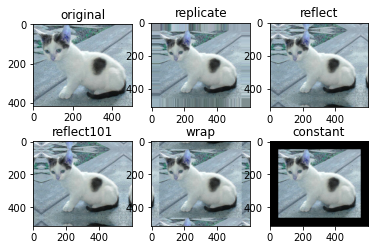

In [25]:
plt.subplot(231)
plt.imshow(img,'gray')
plt.title('original')

plt.subplot(232)
plt.imshow(replicate,'gray')
plt.title('replicate')

plt.subplot(233)
plt.imshow(reflect,'gray')
plt.title('reflect')

plt.subplot(234)
plt.imshow(reflect101,'gray')
plt.title('reflect101')

plt.subplot(235)
plt.imshow(wrap,'gray')
plt.title('wrap')

plt.subplot(236)
plt.imshow(constant,'gray')
plt.title('constant')

几个参数的区别：

+ BORDER_REOLICATE：复制法，也就是复制最边缘像素
+ BORDER_REFLECT：反射法，对感兴趣的图像中的像素再两边进行复制：例如fedcba|abcdefgh|hgfedcb
+ BORDER_REFLECT101：反射法，也就是以最边缘像素为轴对称，例如gfedcb|abcdefgh|gfedcba
+ BORDER_WRAP：外包装法，如cdefgh|abcdefgh|abcdefg
+ BORDER_CONSTANT：常量法，以常数值填充

# 数值计算

In [33]:
img_cat = cv2.imread('cat.jpg')
img_dog = cv2.imread('dog.jpg')

In [27]:
img_cat2 = img_cat + 10
img_cat[:5,:5,0]

array([[142, 146, 151, 150, 142],
       [108, 112, 118, 119, 117],
       [108, 110, 118, 119, 122],
       [139, 141, 148, 148, 151],
       [153, 156, 163, 164, 165]], dtype=uint8)

In [28]:
img_cat2[:5,:5,0]

array([[152, 156, 161, 160, 152],
       [118, 122, 128, 129, 127],
       [118, 120, 128, 129, 132],
       [149, 151, 158, 158, 161],
       [163, 166, 173, 174, 175]], dtype=uint8)

In [29]:
(img_cat + img_cat2)[:5,:,0]
# 152 + 153 = 294
# 图像中像素取值范围是0~255
# 越界会自动 294 % 255 = 38

array([[ 38,  46,  56, ...,  66,  64,  62],
       [226, 234, 246, ...,  64,  62,  60],
       [226, 230, 246, ...,  66,  64,  62],
       [ 32,  36,  50, ...,  66,  64,  62],
       [ 60,  66,  80, ...,  74,  72,  70]], dtype=uint8)

In [31]:
# 区别cv2.add()直接取上界
cv2.add(img_cat,img_cat2)

array([[[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[226, 244, 255],
        [234, 255, 255],
        [246, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[226, 248, 255],
        [230, 255, 255],
        [246, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       ...,

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [222, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [252, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]]

# 图像融合

In [34]:
img_cat + img_dog
# (414,500,3) (429,499,3) shape不同会报错

ValueError: operands could not be broadcast together with shapes (414,500,3) (429,499,3) 

In [35]:
img_cat.shape

(414, 500, 3)

In [36]:
img_dog = cv2.resize(img_dog,(500,414))
img_dog.shape

(414, 500, 3)

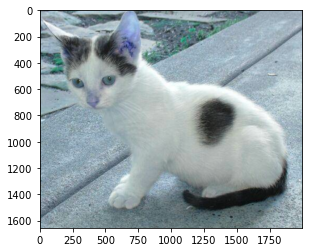

In [37]:
# 或者不指定目标值，采用倍数
res = cv2.resize(img,(0,0),fx=4,fy=4)
plt.imshow(res)

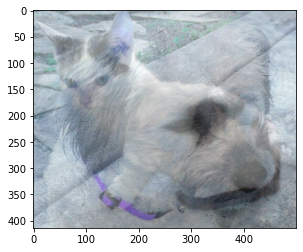

In [38]:
# 加法操作可以指定系数
# αβ是权重，bias可以看作提亮
# R = α* img1 + β * img2 + bias
res = cv2.addWeighted(img_cat,0.5,img_dog,0.5,0)
plt.imshow(res)